In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
path = "C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\PyFinance\\08 - Time series stock data\\"
fb = pd.read_csv(path + 'ticker-fb.csv', index_col = 0, parse_dates = True)
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999


In [24]:
def stockhastic_oscillator(stock):

    high14 = stock['High'].rolling(14).max()
    low14 = stock['Low'].rolling(14).min()
    k = (stock['Close'] - low14) * 100 / (high14 - low14)
    d = k.rolling(3).mean()
    
    return k, d

In [26]:
fb['%K'], fb['%D'] = stockhastic_oscillator(fb)

In [28]:
fb.corr()

,High,Low,Open,Close,Volume,Adj Close,%K,%D
High,1.000000,0.997539,0.998237,0.998124,-0.109488,0.998124,0.137820,0.157635
Low,0.997539,1.000000,0.998019,0.998203,-0.150447,0.998203,0.157933,0.175430
Open,0.998237,0.998019,1.000000,0.996229,-0.128937,0.996229,0.133919,0.162963
Close,0.998124,0.998203,0.996229,1.000000,-0.129503,1.000000,0.162751,0.169839
Volume,-0.109488,-0.150447,-0.128937,-0.129503,1.000000,-0.129503,-0.200041,-0.176915
Adj Close,0.998124,0.998203,0.996229,1.000000,-0.129503,1.000000,0.162751,0.169839
%K,0.137820,0.157933,0.133919,0.162751,-0.200041,0.162751,1.000000,0.906066
%D,0.157635,0.175430,0.162963,0.169839,-0.176915,0.169839,0.906066,1.000000


<AxesSubplot:xlabel='Date'>

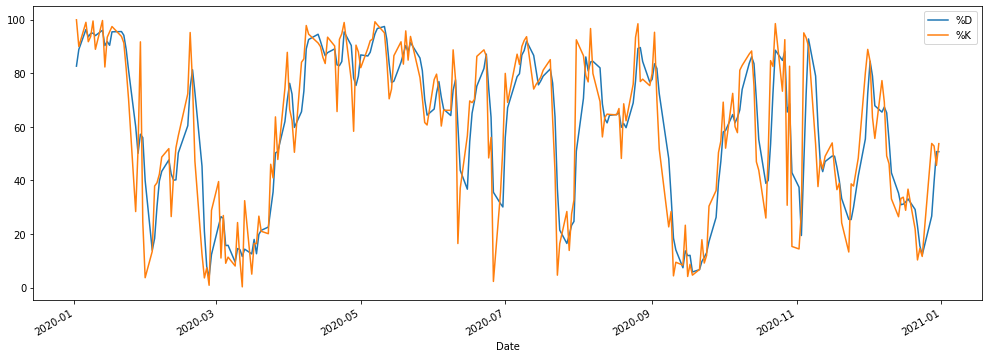

In [7]:
fb[['%D', '%K']].loc['2020-01-01':].plot(figsize = (17,6))

In [34]:
def stockhastic_oscillator_signal(stock):
    signal = []
    for i in range(0, len(stock)):
        if stock['%K'][i] > stock['%D'][i] and stock['%K'][i] > 20 and stock['%K'][i] < 80:
            signal.append(1)
        else:
            signal.append(0)
    
    return signal

In [36]:
fb['SOSignal'] = stockhastic_oscillator_signal(fb)